# L'evoluzione dei temi e dei generi cinematografici nel corso del tempo

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ottiene la directory di lavoro corrente
script_dir = os.getcwd()

# Cartella dove si trovano i file CSV (modifica con il percorso corretto)
clean_path = os.path.join(script_dir, "Data", "clean_data")

# Caricamento dei dataset con percorsi dinamici
actors = pd.read_csv(os.path.join(clean_path, "actors_cleaned.csv"))
countries = pd.read_csv(os.path.join(clean_path, "countries_cleaned.csv"))
crew = pd.read_csv(os.path.join(clean_path, "crew_cleaned.csv"))
genres = pd.read_csv(os.path.join(clean_path, "genres_cleaned.csv"))
languages = pd.read_csv(os.path.join(clean_path, "languages_cleaned.csv"))
movies = pd.read_csv(os.path.join(clean_path, "movies_cleaned.csv"))
posters = pd.read_csv(os.path.join(clean_path, "posters_cleaned.csv"))
releases = pd.read_csv(os.path.join(clean_path, "releases_cleaned.csv"))
studios = pd.read_csv(os.path.join(clean_path, "studios_cleaned.csv"))
themes = pd.read_csv(os.path.join(clean_path, "themes_cleaned.csv"))
oscar_awards = pd.read_csv(os.path.join(clean_path, "the_oscar_awards_cleaned.csv"))
rotten_tomatoes = pd.read_csv(os.path.join(clean_path, "rotten_tomatoes_reviews_cleaned.csv"))


## Qual è la distribuzione dei temi e dei generi nei diversi decedenni?

###### Quali temi e generi erano predominanti in certe epoche?

<Figure size 1600x800 with 0 Axes>

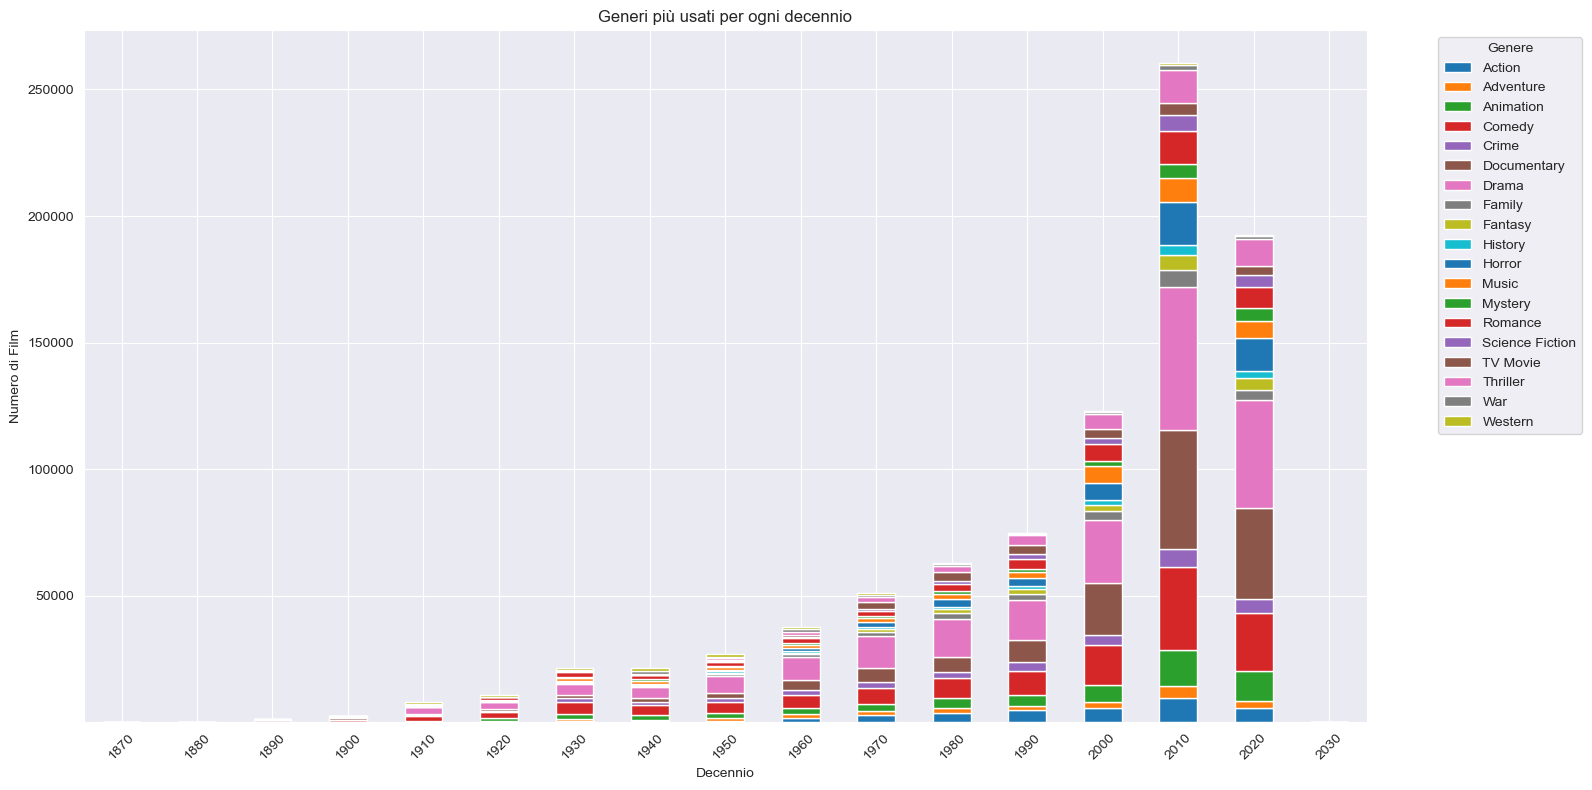

In [85]:
# Creiamo una colonna 'decade' raggruppando gli anni per decennio
movies['decade'] = (movies['date'] // 10) * 10

# Uniamo i dati dei generi con i film
genre_decade = pd.merge(movies, genres, left_on='id', right_on='id', how='inner')

# Conta i generi per decennio
decade_genre_count = genre_decade.groupby(['decade', 'genre']).size().unstack(fill_value=0)

# Grafico dei generi per decennio con barre verticali
plt.figure(figsize=(16, 8))
decade_genre_count.plot(kind='bar', stacked=True, figsize=(16, 8), legend=True)
plt.title('Generi più usati per ogni decennio')
plt.xlabel('Decennio')
plt.ylabel('Numero di Film')
plt.xticks(rotation=45)  # Ruotiamo leggermente le etichette dei decenni per leggibilità
plt.legend(title='Genere', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legenda fuori dal grafico
plt.tight_layout()
plt.show()
